In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [3]:
def AND(a,b):
    input = np.array([a,b])
    weights = np.array([0.4,0.4])
    bias = -0.6
    value = np.sum(input * weights) + bias
    
    if value <= 0:
        return 0
    else:
        return 1

In [4]:
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


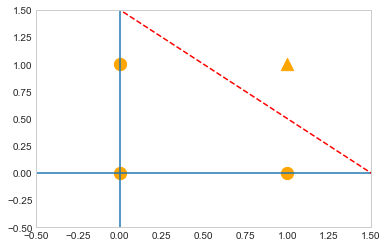

In [5]:
x1 = np.arange(-2,2,0.01)
x2 = np.arange(-2,2,0.01)
bias = -0.6

y = (-0.4 * x1 - bias) / 0.4

plt.axvline(x = 0)
plt.axhline(y = 0)

plt.plot(x1, y, 'r--')
plt.scatter(0,0,color='orange', marker='o',s=150)
plt.scatter(0,1,color='orange', marker='o',s=150)
plt.scatter(1,0,color='orange', marker='o',s=150)
plt.scatter(1,1,color='orange', marker='^',s=150)

plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.grid()
plt.show()

In [8]:
def OR(a,b):
    input = np.array([a,b])
    weights = np.array([0.4, 0.4])
    bias = -0.3
    value = np.sum(input * weights) + bias
    
    if value <= 0:
        return 0
    else:
        return 1


In [10]:
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))


0
1
1
1


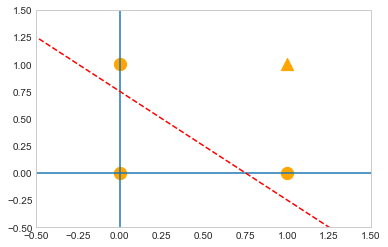

In [11]:
x1 = np.arange(-2,2,0.01)
x2 = np.arange(-2,2,0.01)
bias = -0.3

y = (-0.4 * x1 - bias) / 0.4

plt.axvline(x = 0)
plt.axhline(y = 0)

plt.plot(x1, y, 'r--')
plt.scatter(0,0,color='orange', marker='o',s=150)
plt.scatter(0,1,color='orange', marker='o',s=150)
plt.scatter(1,0,color='orange', marker='o',s=150)
plt.scatter(1,1,color='orange', marker='^',s=150)

plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.grid()
plt.show()

In [19]:
def NAND(a,b):
    input = np.array([a,b])
    weights = np.array([-0.6, -0.6])
    bias = 0.7
    value = np.sum(input * weights) + bias
    
    if value <= 0:
        return 0
    else:
        return 1


In [20]:
print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))


1
1
1
0


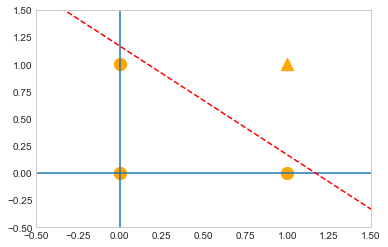

In [22]:
x1 = np.arange(-2,2,0.01)
x2 = np.arange(-2,2,0.01)
bias = 0.7

y = (0.6 * x1 - bias) / -0.6

plt.axvline(x = 0)
plt.axhline(y = 0)

plt.plot(x1, y, 'r--')
plt.scatter(0,0,color='orange', marker='o',s=150)
plt.scatter(0,1,color='orange', marker='o',s=150)
plt.scatter(1,0,color='orange', marker='o',s=150)
plt.scatter(1,1,color='orange', marker='^',s=150)

plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.grid()
plt.show()

In [23]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    
    y = AND(s1, s2)
    
    return y

In [27]:
print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0
1
1
0


In [43]:
#계단함수 StepFunction
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [44]:
print(step_function(-3))
print(step_function(5))

AttributeError: 'bool' object has no attribute 'astype'

In [45]:
#Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [46]:
print(sigmoid(3))
print(sigmoid(-3))

0.9525741268224334
0.04742587317756678


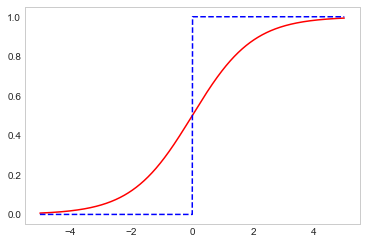

In [47]:
plt.grid()
x = np.arange(-5,5,0.01)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x,y1,'r-',x,y2,'b--')
plt.show()

In [48]:
#ReLU
def ReLU(x):
    if x > 0:
        return x
    else:
        return 0

In [54]:
#tanh
def tanh(x):
    return((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)))


In [55]:
print(tanh(3))
print(tanh(-3))

0.9950547536867306
-0.9950547536867306


In [56]:
#Identity Function , 값이 끊기는지 넘어가는지 확인하는 용도
def identity_function(x):
    return x

In [57]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [58]:
a = np.array([2.0, 1.0, 0.1])
print(softmax(a))
print(np.sum(softmax(a)))

[0.65900114 0.24243297 0.09856589]
1.0


In [60]:
import keras
keras.__version__

'2.4.3'

In [61]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [62]:
train_images.shape

(60000, 28, 28)

In [65]:
len(train_labels)

60000

In [66]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [68]:
len(test_labels)

10000

In [69]:
test_images.shape

(10000, 28, 28)

In [70]:
import matplotlib.pyplot as plt

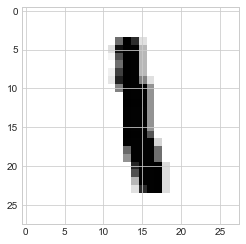

In [74]:
digit = train_images[6]

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [82]:
from keras import models
from keras import layers

In [86]:
network = models.Sequential()
network.add(layers.Dense(units= 512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10,activation = 'softmax'))

In [87]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [89]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [92]:
test_images.shape

(10000, 784)

In [93]:
train_images.shape

(60000, 784)

In [94]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [96]:
network.fit(train_images, train_labels, epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0284 - accuracy: 0.9916
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0213 - accuracy: 0.9940
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0166 - accuracy: 0.9951
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0127 - accuracy: 0.9964
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0101 - accuracy: 0.9970
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0077 - accuracy: 0.9977
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0059 - accuracy: 0.9984
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0043 - accuracy: 0.9988
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0035 - accuracy: 0.9990
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0027 - accuracy: 0.9993

In [97]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 821us/step - loss: 0.1432 - accuracy: 0.9831


In [98]:
print(test_loss, test_acc)

0.1431923806667328 0.9830999970436096
